# Bike Ride Service in San Francisco
## by Mansour Al Rajhi

## Investigation Overview

> We analyze the usage of the bike ride service to identify the primary customers in order for us to target our primary consumer

## Dataset Overview

> The data we use is the 2017 dataset of actual rides which include the type of customer, gender, duration and many other informations

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('2017-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Who are the users?

> Lets start by distingushing the main types of conumers who use our services

- We have a higher base of user who are Subscribers than a one-time customer.
- Also, we have more Male users than Female users
- Most of our users are between the age of 25 and 50 with the highest segment is 30 years old

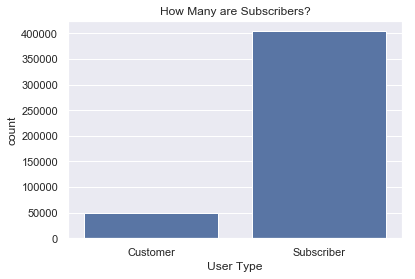

In [10]:
sb.set(style="darkgrid")
ax = sb.countplot(data = bike, x = 'user_type', color = default_color)
ax.set_title('How Many are Subscribers?')
plt.xlabel('User Type')
plt.show()

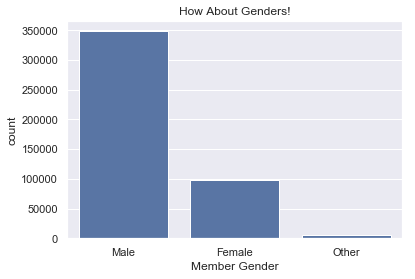

In [11]:
ax = sb.countplot(data = bike, x = 'member_gender', color = default_color)
ax.set_title('How About Genders!')
plt.xlabel('Member Gender')
plt.show()

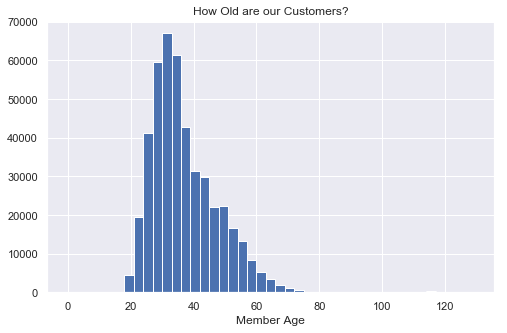

In [12]:
# convert member birth year to int
bike = bike[bike['member_birth_year'].notnull()]
bike.member_birth_year = pd.to_datetime(bike.member_birth_year);
bike.member_birth_year = bike.member_birth_year.astype(int,copy=False);
bike['member_age'] = 2017 - bike.member_birth_year;
bike.drop(bike[bike.member_age < 0].index, inplace = True)
bins = np.arange(0, bike['member_age'].max(), 3)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'member_age', bins = bins)
plt.xlabel('Member Age')
plt.title("How Old are our Customers?")
plt.show()

## Can we dig deeper into these varibles?

> We would like to get more information by finding the relationships between our main variables

- We can notice that Female users tend to use the bike at longer duration than Male users.
- Also, customer use the bike service for a longer duration than subscribers of the bike service which might be becuase that most of the customers who are not subscribers are actually tourist who use the bike to enjoy thier time in San Francisco.
- Male users tend to be older and have an older median than the Female users

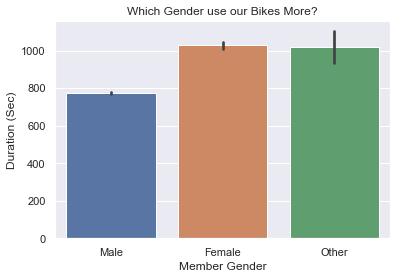

In [13]:
ax = sb.barplot(data = bike, x = 'member_gender', y = 'duration_sec');
ax.set(xlabel='Member Gender', ylabel='Duration (Sec)');
ax.set_title('Which Gender use our Bikes More?');

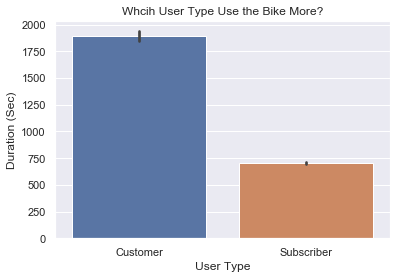

In [14]:
ax = sb.barplot(data = bike, x = 'user_type', y = 'duration_sec');
ax.set(xlabel='User Type', ylabel='Duration (Sec)');
ax.set_title('Whcih User Type Use the Bike More?');

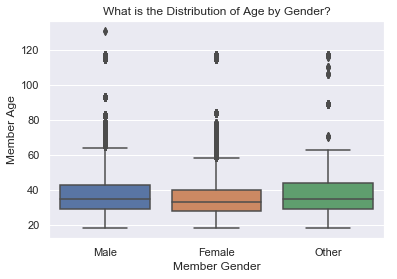

In [15]:
ax = sb.boxplot(x=bike["member_gender"], y=bike["member_age"]);
ax.set(xlabel='Member Gender', ylabel='Member Age');
ax.set_title('What is the Distribution of Age by Gender?');

## Lets reach a conclusion!

> We gonna focus on Duration, Gender, User Type and Age to reach a conclusion about who should we target

- Females use the bike service for a longer period whether they are customers of subscribers. Hence, if we want to target longer usage we should target the Female more in out Marketing campaign.

- Subscribers are older in general for both genders and customers tend to be younger and less than 40 years old in general. Therefore, when targeting tourist we should focus on young customers. On the other hand, when targeting the increase of the subscribtion number we should target the 30 until 45 years old audiance.

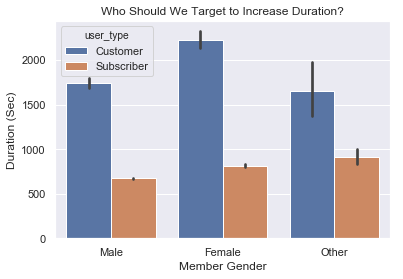

In [16]:
ax = sb.barplot(data = bike, x = 'member_gender', y = 'duration_sec', hue = 'user_type');
ax.set(xlabel='Member Gender', ylabel='Duration (Sec)');
ax.set_title('Who Should We Target to Increase Duration?');

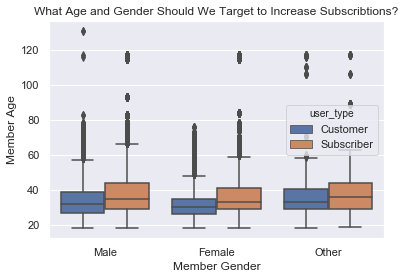

In [17]:
ax = sb.boxplot(x=bike["member_gender"], y=bike["member_age"], hue = bike['user_type']);
ax.set(xlabel='Member Gender', ylabel='Member Age');
ax.set_title('What Age and Gender Should We Target to Increase Subscribtions?');